In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte


if you want to know about CNNs Here is my blog : http://www.datasciencenovice.com/

In [39]:
#importing libraries
from keras.models import Sequential
from keras.layers import Dense,Activation, Conv2D, MaxPool2D, Flatten, Dropout,BatchNormalization
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [40]:
#loading dataset
test = pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")
train = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")

In [41]:
#converting the dataframe into numpy array
train= train.values

#dividng the data set into features and target and standardising by dividing 255
x = train[:,1:].reshape(-1,28,28,1)/255.0 #feature
y = train[:,0].astype(np.int32) # target
y = to_categorical(y) #converting target to 


In [42]:
#Building a Model
model = Sequential()

#adding layer
model.add(Conv2D(input_shape = (28,28,1), filters = 64, kernel_size = (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D())

#adding layer
model.add(Conv2D(input_shape = (28,28,1), filters = 128, kernel_size = (3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D())



#flatting and adding dense layer
model.add(Flatten())
model.add(Dense(units=512))
model.add(Activation ("relu"))
model.add(Dropout (0.5))

model.add(Dense(units = 10 ))
model.add(Activation ("softmax"))

#compling model
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

#using early stopping to stop model from over fitting
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=3)

In [43]:
model.fit(x,y, validation_split= 0.3, epochs = 30, batch_size=32,callbacks=[early_stop])

Epoch 1/30
1313/1313 [==============================] - 57s 44ms/step - loss: 0.4967 - accuracy: 0.8177 - val_loss: 0.3404 - val_accuracy: 0.8746
Epoch 2/30
1313/1313 [==============================] - 57s 43ms/step - loss: 0.3250 - accuracy: 0.8808 - val_loss: 0.2853 - val_accuracy: 0.8944
Epoch 3/30
1313/1313 [==============================] - 56s 43ms/step - loss: 0.2789 - accuracy: 0.8966 - val_loss: 0.2608 - val_accuracy: 0.9060
Epoch 4/30
1313/1313 [==============================] - 57s 43ms/step - loss: 0.2431 - accuracy: 0.9102 - val_loss: 0.2519 - val_accuracy: 0.9096
Epoch 5/30
1313/1313 [==============================] - 56s 43ms/step - loss: 0.2153 - accuracy: 0.9193 - val_loss: 0.2650 - val_accuracy: 0.9025
Epoch 6/30
1313/1313 [==============================] - 56s 43ms/step - loss: 0.1919 - accuracy: 0.9269 - val_loss: 0.2460 - val_accuracy: 0.9131
Epoch 7/30
1313/1313 [==============================] - 56s 42ms/step - loss: 0.1721 - accuracy: 0.9351 - val_loss: 0.2523 -

In [44]:
#storing the information into data frame
loss =pd.DataFrame(model.history.history)

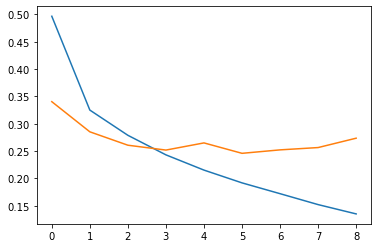

In [45]:
plt.plot(loss.loss, label ="Training loss")
plt.plot(loss.val_loss, label="Validation Loss")

will be updating the notebook soon.